# Análise e Previsão de série temporal: COVID-19

## Parte 1 - Tratamento da base de dados

### 1.1 - Importando pandas, juntando as bases e convertendo Data para Datetime:

In [1]:
import pandas as pd

In [196]:
raw_df_1 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2020_Parte1.csv', sep = ';')
raw_df_2 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2020_Parte2.csv', sep= ';')
raw_df_3 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2021_Parte1.csv', sep= ';')
raw_df_4 = pd.read_csv('data/panel_extraction/HIST_PAINEL_COVIDBR_2021_Parte2.csv', sep= ';')

In [197]:
raw_df = pd.concat([raw_df_1, raw_df_2, raw_df_3, raw_df_4])
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400363 entries, 0 to 809135
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          float64
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(7), int64(5), object(5)
memory usage: 467.0+ MB


In [198]:
raw_df['data'] = pd.to_datetime(raw_df['data'])
raw_df.dtypes

regiao                            object
estado                            object
municipio                         object
coduf                              int64
codmun                           float64
codRegiaoSaude                   float64
nomeRegiaoSaude                   object
data                      datetime64[ns]
semanaEpi                          int64
populacaoTCU2019                 float64
casosAcumulado                   float64
casosNovos                         int64
obitosAcumulado                    int64
obitosNovos                        int64
Recuperadosnovos                 float64
emAcompanhamentoNovos            float64
interior/metropolitana           float64
dtype: object

### 1.2 - Filtrando a base apenas com dados necessários:

In [199]:
raw_df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,NaN,NaN,NaN


In [200]:
filtered_df = raw_df[['regiao', 'data', 'obitosAcumulado', 'obitosNovos']].copy()

In [201]:
filtered_df

,regiao,data,obitosAcumulado,obitosNovos
0,Brasil,2020-02-25,0,0
1,Brasil,2020-02-26,0,0
2,Brasil,2020-02-27,0,0
3,Brasil,2020-02-28,0,0
4,Brasil,2020-02-29,0,0
...,...,...,...,...
809131,Centro-Oeste,2021-11-17,10981,12
809132,Centro-Oeste,2021-11-18,10988,7
809133,Centro-Oeste,2021-11-19,10994,6
809134,Centro-Oeste,2021-11-20,10994,0


### 1.3 Removendo demais regiões:

In [202]:
regions = filtered_df['regiao'].drop_duplicates()
regions


0             Brasil
158            Norte
1264        Nordeste
2686         Sudeste
3318             Sul
3792    Centro-Oeste
Name: regiao, dtype: object

In [203]:
df = filtered_df[filtered_df['regiao'] == 'Brasil']

In [204]:
df

,regiao,data,obitosAcumulado,obitosNovos
0,Brasil,2020-02-25,0,0
1,Brasil,2020-02-26,0,0
2,Brasil,2020-02-27,0,0
3,Brasil,2020-02-28,0,0
4,Brasil,2020-02-29,0,0
...,...,...,...,...
139,Brasil,2021-11-17,611851,373
140,Brasil,2021-11-18,612144,293
141,Brasil,2021-11-19,612370,226
142,Brasil,2021-11-20,612587,217


### 1.4 - Verificando se há dados nulos e Atualizando index:

In [205]:
df['data'].isna().sum()

0

In [206]:
df['data'][0]

0   2020-02-25
0   2020-08-01
0   2021-01-01
0   2021-07-01
Name: data, dtype: datetime64[ns]

In [207]:
df.index = range(df.shape[0])


In [208]:
df

,regiao,data,obitosAcumulado,obitosNovos
0,Brasil,2020-02-25,0,0
1,Brasil,2020-02-26,0,0
2,Brasil,2020-02-27,0,0
3,Brasil,2020-02-28,0,0
4,Brasil,2020-02-29,0,0
...,...,...,...,...
631,Brasil,2021-11-17,611851,373
632,Brasil,2021-11-18,612144,293
633,Brasil,2021-11-19,612370,226
634,Brasil,2021-11-20,612587,217


## Parte 2 - Análise da Série Temporal

### 2.1 - Importando bibliotecas para visualização dos dados e criando funções de plotagem:

In [15]:
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
def plot(title, x_label, y_label, x, y, data):
    sns.set_palette('muted')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=data)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize = 18)
    ax.set_xlabel(x_label, fontsize = 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax = ax

In [17]:
def decomposition_plot(title, x, y1, y2, y3, y4, data):
    plt.figure(figsize = (16,12))
    ax = plt.subplot(4,1,1)
    ax.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=data)
    plt.subplot(4,1,2)
    sns.lineplot(x=x, y=y2, data=data)
    plt.subplot(4,1,3)
    sns.lineplot(x=x, y=y3, data=data)
    plt.subplot(4,1,4)
    sns.lineplot(x=x, y=y4, data=data)

In [18]:
def comparison_plot(title, data):
    plt.figure(figsize=(20,7))
    plt.plot(data, color='blue', label = 'Original')
    plt.plot(data.diff(), color='red', label = '1ª Diferenciação')
    plt.plot(data.diff().diff(), color='green', label = '2ª Diferenciação')
    plt.title(title, fontsize=18, loc='left')
    plt.legend(fontsize=18)

In [19]:
def acf_plot(data):
    fig = plt.figure(figsize=(16,15))
    ax1 = fig.add_subplot(3,1,1)
    fig = plot_acf(data,ax=ax1, title='')
    plt.title('Autocorrelação da série original', fontsize=18, loc='left')
    ax2 = fig.add_subplot(3,1,2)
    fig = plot_acf(data.diff().dropna(),ax=ax2, title='')
    plt.title('Autocorrelação após a 1ª Diferenciação', fontsize=18, loc='left')
    ax3 = fig.add_subplot(3,1,3)
    fig = plot_acf(data.diff().diff().dropna(),ax=ax3, title='')
    plt.title('Autocorrelação após a 2ª Diferenciação', fontsize=18, loc='left')

In [20]:
def pacf_plot(data):
    fig = plt.figure(figsize=(16,15))
    ax1 = fig.add_subplot(3,1,1)
    fig = plot_pacf(data, ax=ax1, title='', lags=40)
    plt.title('Autocorrelação Parcial da série original', fontsize=18, loc='left')
    ax2 = fig.add_subplot(3,1,2)
    fig = plot_pacf(data.diff().dropna(),ax=ax2, title='', lags=40)
    plt.title('Autocorrelação Parcial após a 1ª Diferenciação', fontsize=18, loc='left')
    ax3 = fig.add_subplot(3,1,3)
    fig = plot_pacf(data.diff().diff().dropna(),ax=ax3, title='', lags=40)
    plt.title('Autocorrelação Parcial após a 2ª Diferenciação', fontsize=18, loc='left')

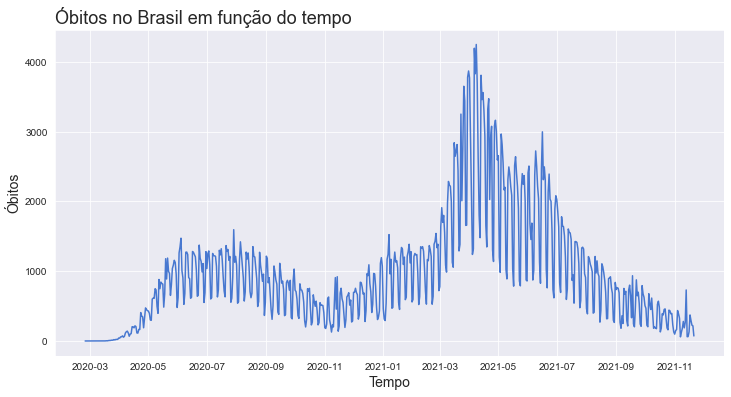

In [21]:
plot('Óbitos no Brasil em função do tempo', 'Tempo', 'Óbitos', 'data', 'obitosNovos', df)

### 2.2 - Analisando Tendência, Sazonalidade e Resíduo:

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

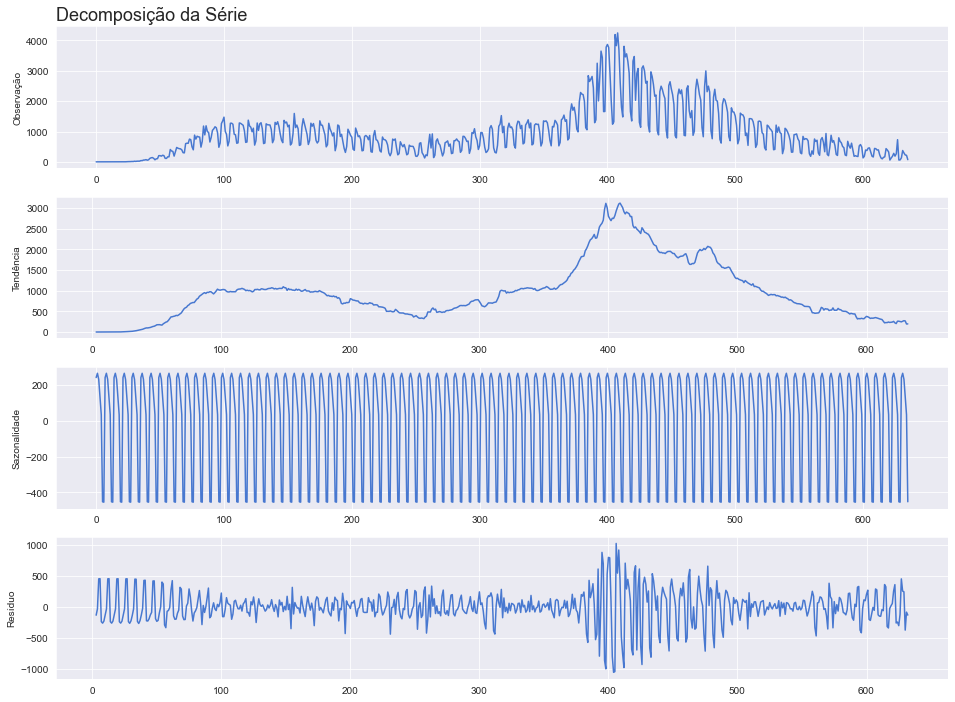

In [23]:
result = seasonal_decompose(df['obitosNovos'], period = 7)

observed = result.observed
trend = result.trend
seasonal = result.seasonal
resid = result.resid

ts_data = (
    {
    'Observação' : observed, 
    'Tendência': trend, 
    'Sazonalidade' : seasonal, 
    'Resíduo' : resid
    }
)

ts = pd.DataFrame(ts_data)
decomposition_plot('Decomposição da Série', ts.index, 'Observação', 'Tendência', 'Sazonalidade', 'Resíduo', ts)

### 2.3 - Definindo Testes de Estacionaridade:

In [24]:
import statsmodels.tsa.api as sm
import warnings
warnings.filterwarnings('ignore')

signif_value = 0.05

#  - Hipótese nula (H0): a série é não estacionária
#  - Hipótese alternativa: a série é estacionária
#  - Calcula-se o valor-p, e caso ele seja abaixo de um valor limite, rejeitamos a hipotese e a série é estacionária

def adh_test(data):
    print('Para o valor de significância de', signif_value, '\n')
    adfuller = sm.adfuller(data)[1]
    print('Teste Dickey Fuller aumentado (Teste ADH): ')
    print('p-valor: ', adfuller)
    print(('Hípotese rejeitada: A série é estacionária', 'Hipótese aceita: A série é não estacionária')[adfuller > signif_value], '\n')

#  - Hipótese nula (H0): a série é estacionária
#  - Hipótese alternativa: a série é não estacionária
#  - Calcula-se o valor-p, e caso ele seja abaixo de um valor limite, rejeitamos a hipotese e a série é não estacionária

def kpss_test(data):
    print('Para o valor de significancia de', signif_value, '\n')
    kpss = sm.kpss(data)[1]
    print('Kwiatkowski-Phillips-Schmidt-Shin - teste KPSS:')
    print('p-valor: ', kpss)
    print(('Hípotese rejeitada: A série é não estacionária', 'Hipótese aceita: A série é estacionária')[kpss > signif_value])


In [25]:
adh_test(df['obitosNovos'])

Para o valor de significância de 0.05 

Teste Dickey Fuller aumentado (Teste ADH): 
p-valor:  0.3822952896336634
Hipótese aceita: A série é não estacionária 



In [26]:
kpss_test(df['obitosNovos'])

Para o valor de significancia de 0.05 

Kwiatkowski-Phillips-Schmidt-Shin - teste KPSS:
p-valor:  0.016791295650303885
Hípotese rejeitada: A série é não estacionária


### 2.4 - Verificando Autocorrelação e Autocorrelação Parcial

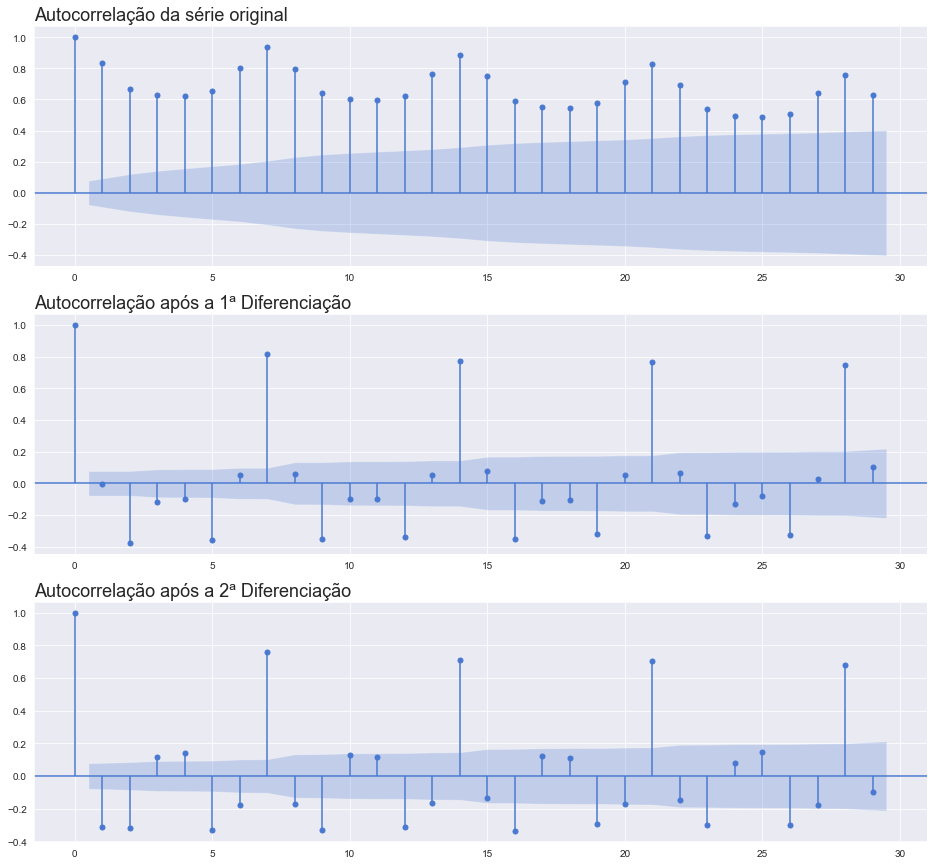

In [27]:
acf_plot(df['obitosNovos'])

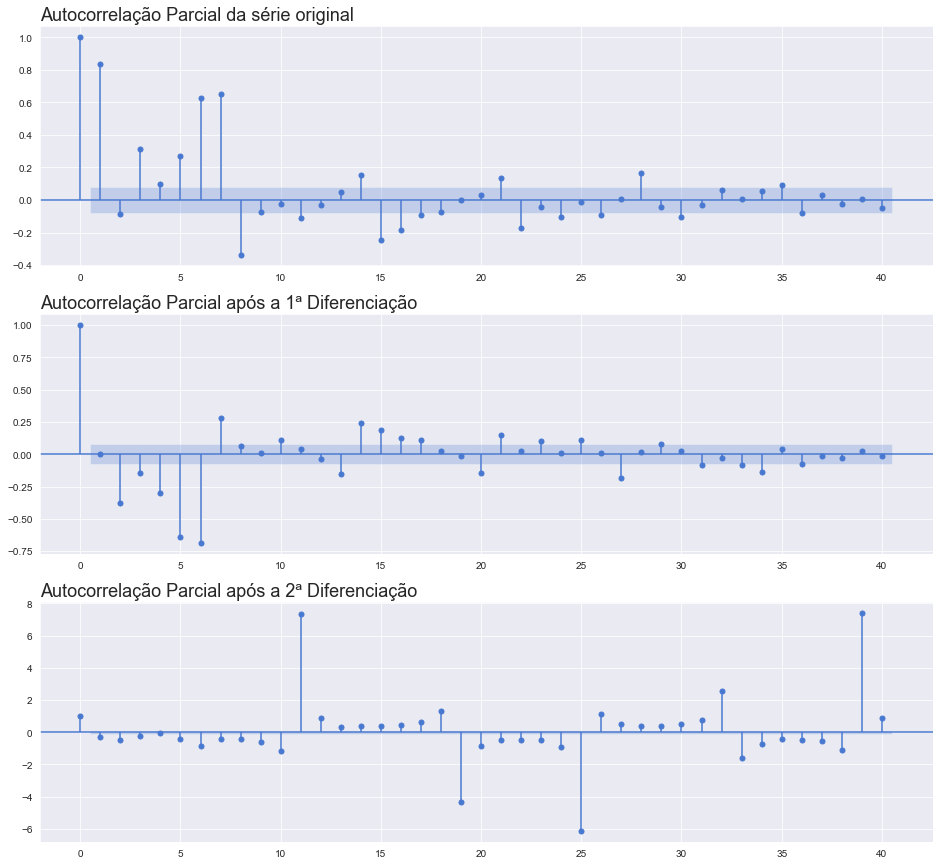

In [28]:
pacf_plot(df['obitosNovos'])

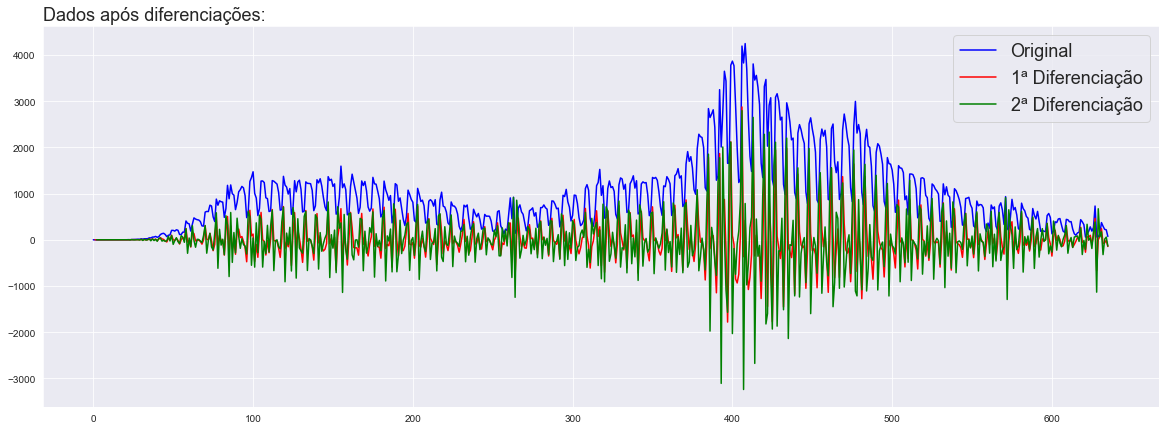

In [29]:
comparison_plot('Dados após diferenciações: ', df['obitosNovos'])

In [30]:
adh_test(df['obitosNovos'].diff().dropna())

Para o valor de significância de 0.05 

Teste Dickey Fuller aumentado (Teste ADH): 
p-valor:  0.001991672196742324
Hípotese rejeitada: A série é estacionária 



In [31]:
kpss_test(df['obitosNovos'].diff().dropna())

Para o valor de significancia de 0.05 

Kwiatkowski-Phillips-Schmidt-Shin - teste KPSS:
p-valor:  0.1
Hipótese aceita: A série é estacionária


## Parte 3 - Previsão da série temporal

## 3.1 Importando bibliotecas e definindo valores para o modelo:

In [36]:
import numpy as np
import itertools as it
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [87]:
## AR(p) Autoregressivo: Regressão Linear, quantos valores anteriores são relevantes para o valor atual?
## I(d) Integrado: Quantas vezes devemos diferenciar?
## MA(q) Média Móvel: Regressão Linear, quantos valores anteriores para os erros passados são relevantes para o valor atual?

p = q = range(0,5)
values = list(it.product(p,q))
d = 1
pdq = [(x[0], d, x[1]) for x in values]
seasonal_pdq = [(x[0], d, x[1], 7) for x in values]
seasonal_pdq

[(0, 1, 0, 7),
 (0, 1, 1, 7),
 (0, 1, 2, 7),
 (0, 1, 3, 7),
 (0, 1, 4, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7),
 (1, 1, 2, 7),
 (1, 1, 3, 7),
 (1, 1, 4, 7),
 (2, 1, 0, 7),
 (2, 1, 1, 7),
 (2, 1, 2, 7),
 (2, 1, 3, 7),
 (2, 1, 4, 7),
 (3, 1, 0, 7),
 (3, 1, 1, 7),
 (3, 1, 2, 7),
 (3, 1, 3, 7),
 (3, 1, 4, 7),
 (4, 1, 0, 7),
 (4, 1, 1, 7),
 (4, 1, 2, 7),
 (4, 1, 3, 7),
 (4, 1, 4, 7)]

In [109]:
aic_arima_values = []
bic_arima_values = []

for param in pdq:
    mod = sm.ARIMA(df['obitosNovos'], order=param)
    results = mod.fit(disp=0)
    print('ARIMA {} - AIC{}'.format(param, results.aic))
    print('ARIMA {} - BIC{}'.format(param, results.bic))
    aic_arima_values.append([results.aic, param])
    bic_arima_values.append([results.bic, param])


ARIMA (0, 1, 0) - AIC9588.058683809186
ARIMA (0, 1, 0) - BIC9596.96593380697
ARIMA (0, 1, 1) - AIC9590.049080114326
ARIMA (0, 1, 1) - BIC9603.409955111005
ARIMA (0, 1, 2) - AIC9350.414947260302
ARIMA (0, 1, 2) - BIC9368.229447255873
ARIMA (0, 1, 3) - AIC9352.37989450105
ARIMA (0, 1, 3) - BIC9374.648019495513
ARIMA (0, 1, 4) - AIC9199.818477648163
ARIMA (0, 1, 4) - BIC9226.540227641519
ARIMA (1, 1, 0) - AIC9590.056350093722
ARIMA (1, 1, 0) - BIC9603.417225090401
ARIMA (1, 1, 1) - AIC9434.258724484158
ARIMA (1, 1, 1) - BIC9452.07322447973
ARIMA (1, 1, 2) - AIC9352.398758197174
ARIMA (1, 1, 2) - BIC9374.666883191638
ARIMA (1, 1, 3) - AIC9255.049190946176
ARIMA (1, 1, 3) - BIC9281.770940939532
ARIMA (1, 1, 4) - AIC9192.922937521476
ARIMA (1, 1, 4) - BIC9224.098312513725
ARIMA (2, 1, 0) - AIC9494.395866278584
ARIMA (2, 1, 0) - BIC9512.210366274156
ARIMA (2, 1, 1) - AIC9310.186791177663
ARIMA (2, 1, 1) - BIC9332.454916172126
ARIMA (2, 1, 2) - AIC9166.915147004687
ARIMA (2, 1, 2) - BIC9193.63

In [115]:
arima_min_aic = min(aic_arima_values)
print('Menor aic: ', arima_min_aic[0])
print('Parametros: ', arima_min_aic[1])

Menor aic:  8850.849704645994
Parametros:  (4, 1, 4)


In [117]:
arima_min_bic = min(bic_arima_values)
print('Menor bic: ', arima_min_bic[0])
print('Parametros: ', arima_min_bic[1])

Menor bic:  8895.385954634921
Parametros:  (4, 1, 4)


In [119]:
aic_sarima_values = []
bic_sarima_values = []

for param in pdq:
    for seasonal_param in seasonal_pdq:
        mod = SARIMAX(df['obitosNovos'], order=param, seasonal_order=seasonal_param)
        results = mod.fit()
        print('SARIMA {}x{} - AIC{}'.format(param, seasonal_param, results.aic))
        print('SARIMA {}x{} - BIC{}'.format(param, seasonal_param, results.bic))
        aic_sarima_values.append([results.aic, param, seasonal_param])
        bic_sarima_values.append([results.bic, param, seasonal_param])

SARIMA (0, 1, 0)x(0, 1, 0, 7) - AIC8855.154606479251
SARIMA (0, 1, 0)x(0, 1, 0, 7) - BIC8859.59714664572
SARIMA (0, 1, 0)x(0, 1, 1, 7) - AIC8684.499160160953
SARIMA (0, 1, 0)x(0, 1, 1, 7) - BIC8693.38424049389
SARIMA (0, 1, 0)x(0, 1, 2, 7) - AIC8684.263937894277
SARIMA (0, 1, 0)x(0, 1, 2, 7) - BIC8697.591558393682
SARIMA (0, 1, 0)x(0, 1, 3, 7) - AIC8685.140358955901
SARIMA (0, 1, 0)x(0, 1, 3, 7) - BIC8702.910519621773
SARIMA (0, 1, 0)x(0, 1, 4, 7) - AIC8686.767433115783
SARIMA (0, 1, 0)x(0, 1, 4, 7) - BIC8708.980133948124
SARIMA (0, 1, 0)x(1, 1, 0, 7) - AIC8753.411266206544
SARIMA (0, 1, 0)x(1, 1, 0, 7) - BIC8762.29634653948
SARIMA (0, 1, 0)x(1, 1, 1, 7) - AIC8684.562181535413
SARIMA (0, 1, 0)x(1, 1, 1, 7) - BIC8697.889802034819
SARIMA (0, 1, 0)x(1, 1, 2, 7) - AIC8685.554089224188
SARIMA (0, 1, 0)x(1, 1, 2, 7) - BIC8703.32424989006
SARIMA (0, 1, 0)x(1, 1, 3, 7) - AIC8686.46039777677
SARIMA (0, 1, 0)x(1, 1, 3, 7) - BIC8708.67309860911
SARIMA (0, 1, 0)x(1, 1, 4, 7) - AIC8681.422426861776

In [124]:
sarima_min_aic = min(aic_sarima_values)
print('Menor aic: ', sarima_min_aic[0])
print('Parametros: ', sarima_min_aic[1], 'x', sarima_min_aic[2])

Menor aic:  8491.781678647525
Parametros:  (2, 1, 2) , (1, 1, 2, 7)


In [125]:
sarima_min_bic = min(bic_sarima_values)
print('Menor bic: ', sarima_min_bic[0])
print('Parametros: ', sarima_min_bic[1], 'x', sarima_min_bic[2])

Menor bic:  8518.98198274953
Parametros:  (2, 1, 2) x (0, 1, 1, 7)


In [132]:
mod = ARIMA(df['obitosNovos'], order=(4,1,4))
mod_fit = mod.fit(disp=0)
print(mod_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.obitosNovos   No. Observations:                  635
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -4415.425
Method:                       css-mle   S.D. of innovations            252.079
Date:                Wed, 24 Nov 2021   AIC                           8850.850
Time:                        02:04:49   BIC                           8895.386
Sample:                             1   HQIC                          8868.143
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3104      2.852      0.109      0.913      -5.280       5.900
ar.L1.D.obitosNovos     0.7786      0.021     36.952      0.000       0.737       0.820
ar.L2.D.obitosNo

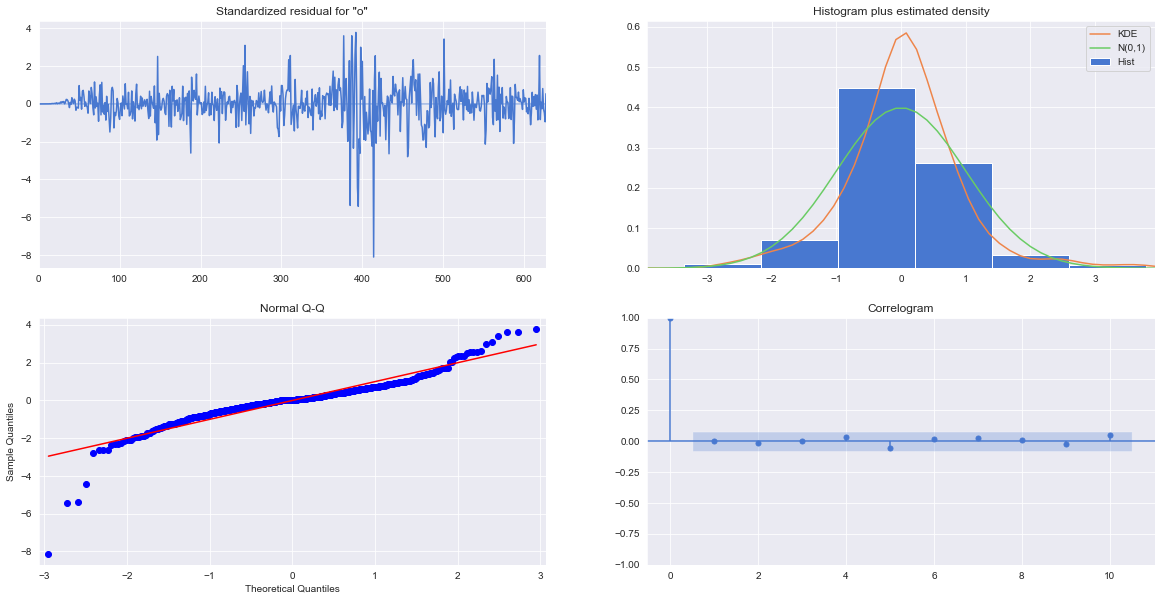

In [131]:
mod = SARIMAX(df['obitosNovos'], order=(2,1,2), seasonal_order = (0,1,1,7))
results = mod.fit()
results.plot_diagnostics(figsize=(20,10))
plt.show()

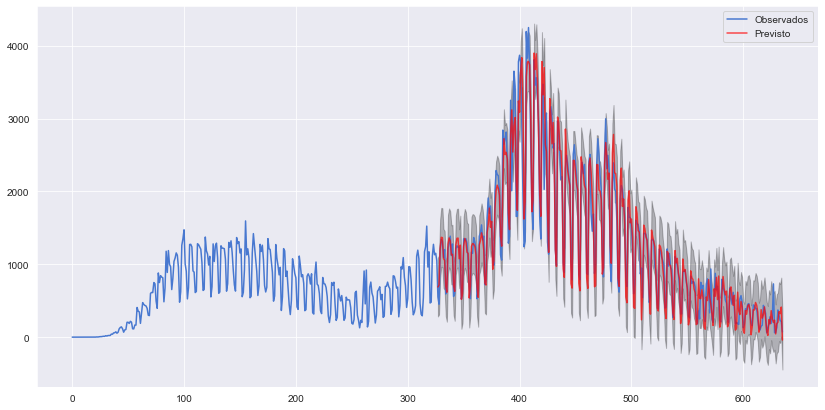

In [237]:
# https://g1.globo.com/saude/coronavirus/vacinas/noticia/2021/11/17/vacinacao-contra-a-covid-brasil-passa-eua-em-taxa-de-totalmente-imunizados.ghtml
# https://www.cnnbrasil.com.br/saude/mais-de-83-dos-brasileiros-adultos-com-vacinacao-completa-contra-a-covid/
# https://www1.folha.uol.com.br/equilibrioesaude/2021/11/brasil-chega-a-80-da-populacao-adulta-com-esquema-vacinal-completo.shtml


pred = results.get_prediction(start = 327, dynamic = False)
pred_ci = pred.conf_int()
ax = df['obitosNovos'][0:].plot(label='Observados')
pred.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7, figsize = (14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha = 0.25)
plt.legend()
plt.show()

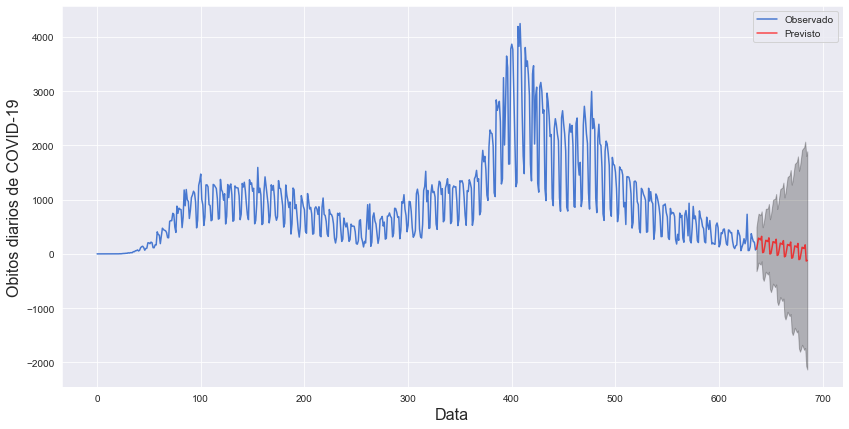

In [238]:
pred_uc = results.get_forecast(steps = 50)
pred_ci = pred_uc.conf_int()
ax = df['obitosNovos'].plot(label='Observado', figsize = (14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color = 'r', alpha = 0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha = 0.25)
plt.legend()
ax.set_xlabel('Data', fontsize = 16)
ax.set_ylabel('Obitos diarios de COVID-19', fontsize = 16)
plt.show()

In [231]:
df.shape[0]

636